In [5]:
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dicts = []
# for p in glob.glob(r"C:\Users\tatsuya\PycharmProjects\strn\data2\*.result.json"):
for p in glob.glob(r"C:\Users\tatsuya\PycharmProjects\strn\wine\*.result.json"):
# for p in glob.glob(r"C:\Users\tatsuya\PycharmProjects\strn\*.result.json"):


    with open(p,mode="r",encoding="utf-8") as f:
        try:
            dicts.append(json.load(f))
        except:
            pass

In [7]:
import matplotlib.pyplot as plt
import copy

# fig,ax = plt.subplots()

dicts_virgin = copy.deepcopy(dicts)

dfs = [pd.DataFrame(d["indicators"]).drop(columns=["epoch"]) for d in dicts_virgin]
dfs = [df.iloc[100:] for df in dfs]
# print(dfs[0])
# for df in dfs:
#     df.plot()

# values = np.stack([pd.DataFrame(d["indicators"]).drop(columns=["epoch"]).values for d in dicts_virgin],axis=-1).mean(axis = -1)
# df = pd.DataFrame(values,columns=[k for k in dicts[0]["indicators"][0].keys() if k !="epoch"]).plot(ax=ax)

# values = np.stack([pd.DataFrame(d["indicators"]).drop(columns=["epoch"]).values for d in not_freezing],axis=-1).mean(axis = -1)
# df = pd.DataFrame(values,columns=[k for k in dicts[0]["indicators"][0].keys() if k !="epoch"]).plot(ax=ax)

    

ValueError: all input arrays must have the same shape

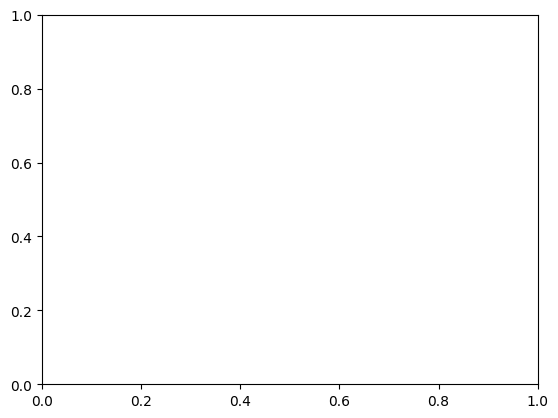

In [8]:
import matplotlib.pyplot as plt
import copy

fig,ax = plt.subplots()

dicts_virgin = copy.deepcopy(dicts)

# freezing = [d for d in dicts_virgin if d["freezing"]]
# not_freezing = [d for d in dicts_virgin if not d["freezing"]]

values = np.stack([pd.DataFrame(d["indicators"]).drop(columns=["epoch"]).values for d in dicts_virgin],axis=-1).mean(axis = -1)
df = pd.DataFrame(values,columns=[k for k in dicts[0]["indicators"][0].keys() if k !="epoch"]).plot(ax=ax)

# values = np.stack([pd.DataFrame(d["indicators"]).drop(columns=["epoch"]).values for d in not_freezing],axis=-1).mean(axis = -1)
# df = pd.DataFrame(values,columns=[k for k in dicts[0]["indicators"][0].keys() if k !="epoch"]).plot(ax=ax)

    

In [ ]:
values

array([[0.96534416, 0.96459654, 0.87854344],
       [0.91271678, 0.91035059, 0.77532932],
       [0.87076497, 0.86717203, 0.65835047],
       ...,
       [0.26720665, 0.26681064, 0.24031456],
       [0.2670726 , 0.26668267, 0.23387539],
       [0.27112916, 0.27079864, 0.24809461]])

ValueError: No objects to concatenate

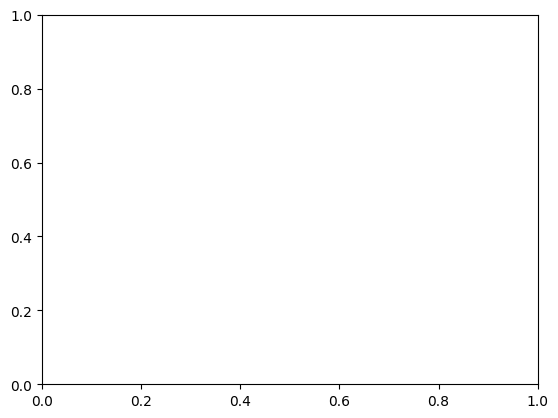

In [ ]:
import matplotlib.pyplot as plt
import copy
import matplotlib.pyplot as plt
import copy


dicts_virgin = copy.deepcopy(dicts)

fig,ax =  plt.subplots(1,1)
dicts_virgin = [d for d in dicts_virgin if not d["aggregate"]=="simple_agg"]
dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]
# 
# dicts_virgin = [d for d in dicts_virgin if d["aggregate"]=="weight_and_pred_2"]
# dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]

corr_dicts = [d for d in dicts_virgin if (d["corr"]&d["corr_abs"])]
not_dicts = [d for d in dicts_virgin if not  (d["corr"]&d["corr_abs"])]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in corr_dicts],axis=1)
corr_mean[corr_mean>1] = np.nan
corr_mean = corr_mean.mean(axis=1)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in not_dicts],axis=1)
not_mean[not_mean>1] = np.nan
not_mean = not_mean.mean(axis=1)
corr_mean.plot(label = "corr")
not_mean.plot(label = "not_corr")

# dicts_virgin = copy.deepcopy(dicts)
# simplest_dicts = [d for d in dicts_virgin if (not d["corr"])&(d["aggregate"]=="simple_agg")&(d["freezing"]==0)&(not d["weighted_learn"])]
# simplest = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in simplest_dicts],axis=1).median(axis=1)
# simplest.plot(label = "simplest")





plt.legend()
# for d in dicts_virgin:
#     # corr = d["corr"]&d["corr_abs"]
    
#     df = pd.DataFrame(d["indicators"])["simple_testLoss"]
#     df = df.loc[df.values < 1]
#     ax.plot(df,color = "red" if corr else "blue")




ValueError: No objects to concatenate

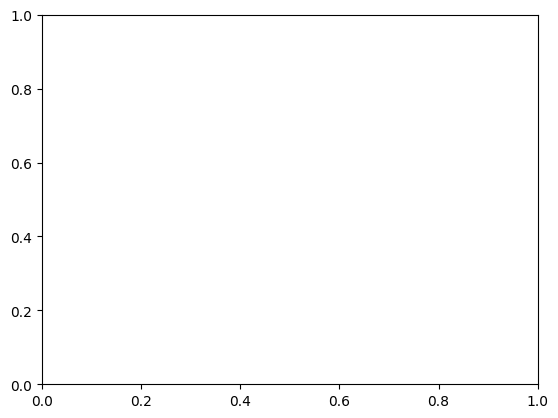

In [ ]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
dicts_virgin = [d for d in dicts_virgin if d["aggregate"]=="simple_agg"]
dicts_virgin = [d for d in dicts_virgin if not d["corr"]]
dicts_virgin = [d for d in dicts_virgin if not d["freezing"]]
# dicts_virgin = [d for d in dicts_virgin if not d["freezing"]]



fig,ax =  plt.subplots(1,1)

corr_dicts = [d for d in dicts_virgin if d["weighted_learn"]]
not_dicts = [d for d in dicts_virgin if not  d["weighted_learn"]]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean[corr_mean<1].mean(axis=1)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean[not_mean<1]
not_mean = not_mean.mean(axis=1)

corr_mean.plot(label = "weighted")
not_mean.plot(label = "not_weighted")

plt.legend()
# for d in dicts_virgin:
#     # corr = d["corr"]&d["corr_abs"]
    
#     df = pd.DataFrame(d["indicators"])["simple_testLoss"]
#     df = df.loc[df.values < 1]
#     ax.plot(df,color = "red" if corr else "blue")




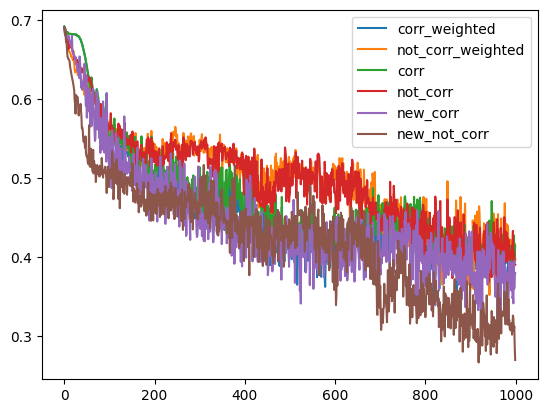

In [9]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)

fig,ax =  plt.subplots(1,1)


# dicts_virgin = [d for d in dicts_virgin if d["aggregate"]=="weight_and_pred"]


corr_dicts = [d for d in dicts_virgin if d["corr_abs"]&d["corr"]]
not_dicts = [d for d in dicts_virgin if not  d["corr_abs"]&d["corr"]]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["weighted_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean[corr_mean<1].median(axis=1)

not_mean = pd.concat([pd.DataFrame(d["indicators"])["weighted_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean[not_mean<1].median(axis=1)

corr_mean.plot(label = "corr_weighted")
not_mean.plot(label = "not_corr_weighted")

corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean[corr_mean<1].median(axis=1)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean[not_mean<1].median(axis=1)

corr_mean.plot(label = "corr")
not_mean.plot(label = "not_corr")

corr_mean = pd.concat([pd.DataFrame(d["indicators"])["new_weighted_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean[corr_mean<1].median(axis=1)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["new_weighted_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean[not_mean<1].median(axis=1)

corr_mean.plot(label = "new_corr")
not_mean.plot(label = "new_not_corr")



plt.legend()
# for d in dicts_virgin:
#     # corr = d["corr"]&d["corr_abs"]
    
#     df = pd.DataFrame(d["indicators"])["simple_testLoss"]
#     df = df.loc[df.values < 1]
#     ax.plot(df,color = "red" if corr else "blue")




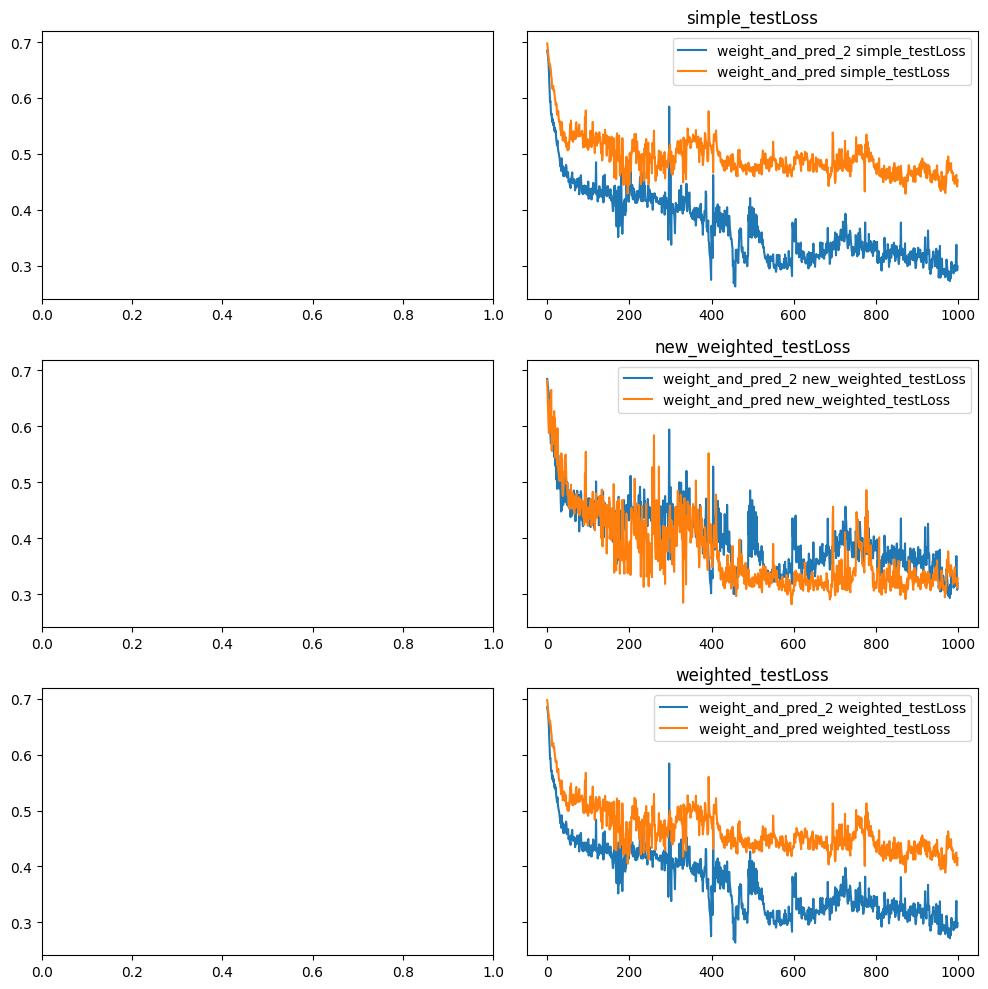

In [ ]:
import matplotlib.pyplot as plt
import copy
import numpy as np

dicts_virgin = copy.deepcopy(dicts)
dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]


fig,ax =  plt.subplots(3,2,sharey=True)
fig.set_size_inches(10,10)
# fig, ax = plt.subplots(3, 2, sharey=True)
# fig.set_size_inches(10, 10)
aggs = list(set([d["aggregate"] for d in dicts_virgin]))

for pred_i, pred in enumerate(["simple_testLoss", "new_weighted_testLoss", "weighted_testLoss"]):
    for agg in aggs:
        if agg == "weight_average":
            continue
        if agg == "simple_agg":
            continue
        for corr in [0, 1]:
            targets = [d for d in dicts_virgin if (d["aggregate"] == agg) & (d["corr"] == corr) & (d["corr_abs"] == corr)]
            if not targets:
                continue
            corr_mean = pd.concat([pd.DataFrame(d["indicators"])[pred] for d in targets], axis=1)
            corr_mean[corr_mean>1] = np.nan
            corr_mean = corr_mean.loc[corr_mean.values<1].median(axis = 1)
            
            corr_mean.plot(label=agg + " " + pred, ax=ax[pred_i, corr])
            # simplest.plot(label="simplest", ax=ax[pred_i, corr])
            ax[pred_i, corr].legend()
            ax[pred_i, corr].set_title(pred)
            

# ax[0, 0].set_title(f"{aggs[0]}, Corr 0")
# ax[0, 1].set_title(f"{aggs[0]}, Corr 1")
# ax[1, 0].set_title(f"{aggs[1]}, Corr 0")
# ax[1, 1].set_title(f"{aggs[1]}, Corr 1")
# ax[2, 0].set_title(f"{aggs[2]}, Corr 0")
# ax[2, 1].set_title(f"{aggs[2]}, Corr 1")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()
plt.close()

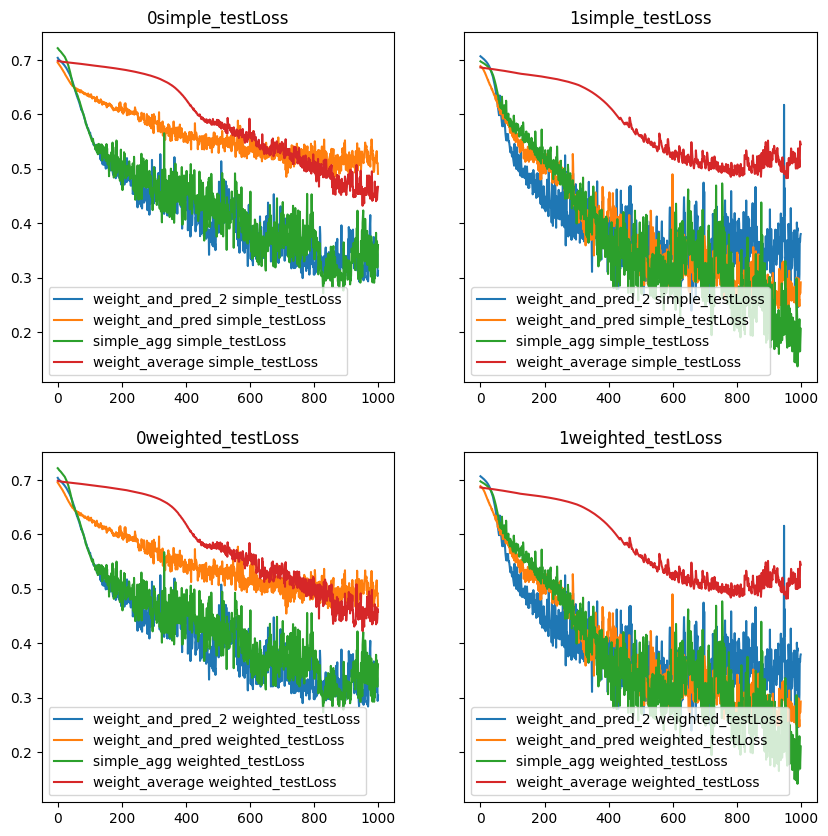

In [ ]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
# dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]
dicts_virgin = [d for d in dicts_virgin if d["weighted_learn"]]

fig,ax =  plt.subplots(2,2,sharey=True)
fig.set_size_inches(10,10)

aggs = set([d["aggregate"] for d in dicts_virgin])
# for pred_i,pred in enumerate(["simple_testLoss","new_weighted_testLoss","weighted_testLoss"]):
for pred_i,pred in enumerate(["simple_testLoss","weighted_testLoss"]):
    for corr in [0,1]:
        for agg in aggs:
            targets = [d for d in dicts_virgin if (d["aggregate"]==agg)&(d["corr"]==corr)&(d["corr_abs"]==corr)]
            if not targets:
                continue
            corr_mean = pd.concat([pd.DataFrame(d["indicators"])[pred] for d in targets],axis=1).median(axis=1)
            # corr_mean = corr_mean[corr_mean<1].median(axis=1)
            corr_mean.plot(label=agg +" " +  pred,ax= ax[pred_i,corr])
        ax[pred_i,corr].legend()
        ax[pred_i,corr].set_title(str(corr) + pred)
        
plt.legend()

<Axes: >

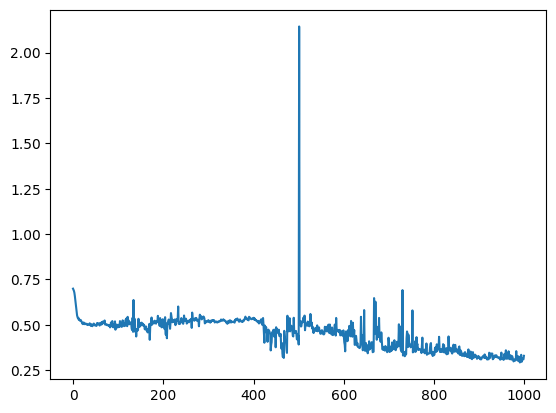

In [ ]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
simplest_dicts = [d for d in dicts_virgin if (not d["corr"])&(d["aggregate"]=="simple_agg")&(d["freezing"]==0)&(not d["weighted_learn"])]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in simplest_dicts],axis=1).median(axis=1)
corr_mean.plot()